### Random Forest with 50 dummy features

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
# Read the dataset
data = pd.read_csv("./data_top50_dfeatures.csv")
data.shape

(99340, 51)

In [9]:
data.head()

,num_lab_procedures,num_medications,time_in_hospital,age,num_procedures,number_diagnoses,number_inpatient,service_utilization,admission_source_id,gender,...,diag_1_others,glipizide_No,glipizide_Steady,payer_code_SP,insulin_Up,medical_specialty_Emergency/Trauma,metformin_No,metformin_Steady,payer_code_MD,readmitted
0,-0.097257,-1.850433,-1.138455,5,-0.783548,-3.298205,-0.635213,-0.774135,-1.431088,0,...,0,1,0,0,0,0,1,0,0,0
1,0.820652,0.249657,-0.464686,15,-0.783548,0.823423,-0.635213,-0.774135,0.648827,0,...,0,1,0,0,1,0,1,0,0,0
2,-1.627106,-0.368016,-0.801570,25,2.152858,-0.722187,0.724104,1.319347,0.648827,0,...,1,0,1,0,0,0,1,0,0,0
3,0.055727,0.002588,-0.801570,35,-0.196267,-0.206984,-0.635213,-0.774135,0.648827,1,...,0,1,0,0,1,0,1,0,0,0
4,0.412692,-0.985690,-1.138455,45,-0.783548,-1.237391,-0.635213,-0.774135,0.648827,1,...,0,0,1,0,0,0,1,0,0,0


In [10]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)


In [11]:
y_train.value_counts()

0    70421
1     9051
Name: readmitted, dtype: int64

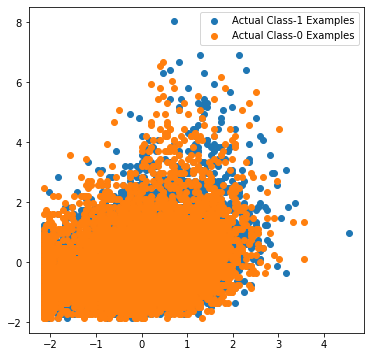

In [12]:
from collections import Counter
import numpy as np

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure()
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [16]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [17]:
y_train.value_counts()

1    70421
0    70421
Name: readmitted, dtype: int64

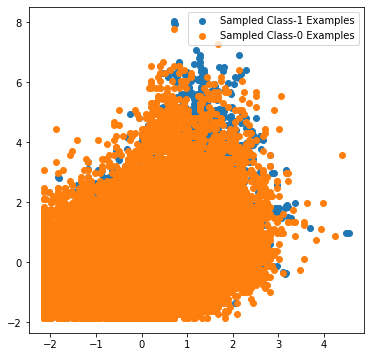

In [15]:
from collections import Counter
import numpy as np

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure()
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Sampled Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Sampled Class-0 Examples')
plt.legend()

In [18]:
# Random Forest

# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [20]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# predict
predictions = rfc.predict(X_test)

In [22]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[17386   219]
 [ 2178    85]]


In [23]:
print(accuracy_score(y_test,predictions))

0.8793537346486813


In [24]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17605
           1       0.28      0.04      0.07      2263

    accuracy                           0.88     19868
   macro avg       0.58      0.51      0.50     19868
weighted avg       0.82      0.88      0.84     19868



In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {'max_features': [4, 8, 14, 20],
             'n_estimators': range(100, 1500, 400),
             'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(200, 500, 50),
             }
# instantiate the model 
rf = RandomForestClassifier()


# fit tree on training data
rf = RandomizedSearchCV(rf, param_grid, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True,
                  n_jobs = -1,verbose = 1)
rf.fit(X_train, y_train)

best_parameters = rf.best_params_
print(best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500, 'min_samples_split': 400, 'min_samples_leaf': 150, 'max_features': 20, 'max_depth': 17}


In [27]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,252.560687,1.485736,7.979145,0.093962,1300,300,200,4,7,"{'n_estimators': 1300, 'min_samples_split': 30...",...,0.804086,0.069208,6,0.859807,0.799641,0.799874,0.796315,0.797886,0.810705,0.024585
1,153.775106,1.418453,3.052321,0.047506,500,350,300,8,7,"{'n_estimators': 500, 'min_samples_split': 350...",...,0.791831,0.065694,9,0.848722,0.788752,0.788239,0.787067,0.785638,0.799683,0.024542
2,428.433719,5.365851,4.149344,0.072758,500,400,150,20,17,"{'n_estimators': 500, 'min_samples_split': 400...",...,0.861974,0.100324,1,0.911363,0.858076,0.856773,0.857465,0.856790,0.868093,0.021640
3,377.307285,5.683086,7.620578,0.576646,900,250,100,8,12,"{'n_estimators': 900, 'min_samples_split': 250...",...,0.852957,0.093787,3,0.910191,0.850026,0.849167,0.847986,0.849033,0.861281,0.024464
4,46.247614,1.363003,0.659670,0.027342,100,300,150,14,7,"{'n_estimators': 100, 'min_samples_split': 300...",...,0.803405,0.075199,7,0.853168,0.793092,0.801498,0.802608,0.801880,0.810449,0.021639


In [28]:
# Get the best parameters
best_parameters = rf.best_params_
print(best_parameters)

{'n_estimators': 500, 'min_samples_split': 400, 'min_samples_leaf': 150, 'max_features': 20, 'max_depth': 17}


In [29]:
# Build the Random Forest with the best_parameters
rf_best = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
# fit the model
rf_best.fit(X_train, y_train)

# predict
best_predictions = rf_best.predict(X_test)

In [30]:
# evaluation metrics
print(classification_report(y_test,best_predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17605
           1       0.25      0.13      0.17      2263

    accuracy                           0.86     19868
   macro avg       0.57      0.54      0.54     19868
weighted avg       0.82      0.86      0.84     19868



In [31]:
# Let's check the overall accuracy over the test dataset
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
print("Accuracy_score: ", metrics.accuracy_score(y_test, best_predictions))

print("AUC_accu =", metrics.roc_auc_score(y_test, best_predictions ))
print("Precision_score = ",precision_score(y_test, best_predictions))
print("recall_score = ",recall_score(y_test, best_predictions))


Accuracy_score:  0.85761022750151
AUC_accu = 0.5386076947820055
Precision_score =  0.25044091710758376
recall_score =  0.1254971277065842


Validation AUC Accuracy=  0.8652390666397679
Validation Accuracy=  0.8652390500719533


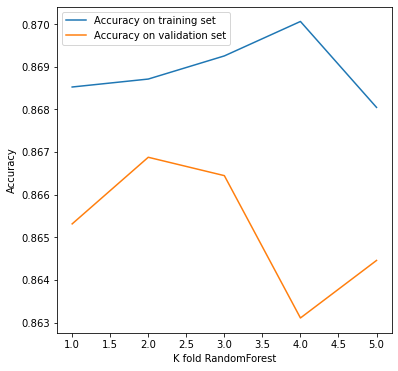

In [32]:
# validate the model using kfold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

y_train_skf = y_train.values
X_train_skf = X_train.values
train_score = []
test_score = []
splits=5
folds=range(1,splits+1)
val_auc_score = 0.0
val_accracy_score = 0.0
skf = StratifiedKFold(n_splits=splits, shuffle=True)
for train_index, test_index in skf.split(X_train_skf, y_train_skf):
    X_train_cv, y_train_cv = X_train_skf[train_index], y_train_skf[train_index]
    X_test_cv, y_test_cv = X_train_skf[test_index], y_train_skf[test_index]
    rf_val = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
    rf_val.fit(X_train_cv,y_train_cv)
    y_test_cv_predict = rf_val.predict(X_test_cv)
    val_auc_score += metrics.roc_auc_score(y_test_cv, y_test_cv_predict)
    val_accracy_score += metrics.accuracy_score(y_test_cv, y_test_cv_predict)
    train_score.append(rf_val.score(X_train_cv,y_train_cv))
    test_score.append(rf_val.score(X_test_cv,y_test_cv))

print("Validation AUC Accuracy= ", val_auc_score/splits)
print("Validation Accuracy= ", val_accracy_score/splits) 
plt.plot(folds,train_score,label= 'Accuracy on training set')
plt.plot(folds,test_score,label= 'Accuracy on validation set')
plt.xlabel('K fold RandomForest')
plt.ylabel('Accuracy')
plt.legend()